# Data visualization
This notebook is for visualizing the data distribution of the EE questions to get a quick understanding of the sample population and any potential imbalances. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals


In [3]:
# Vars
courses_cg = [202, 250]
courses_ee = [251, 424, 551]
courses = courses_cg + courses_ee

deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]

# current semester (for script purposes)
semester = "F2025"

In [4]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [5]:
ee_data = pd.read_csv(ee_data_path, header=[0,1], index_col=0)
cg_data = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
data_all = [ee_data, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

## Interest
### Interest questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


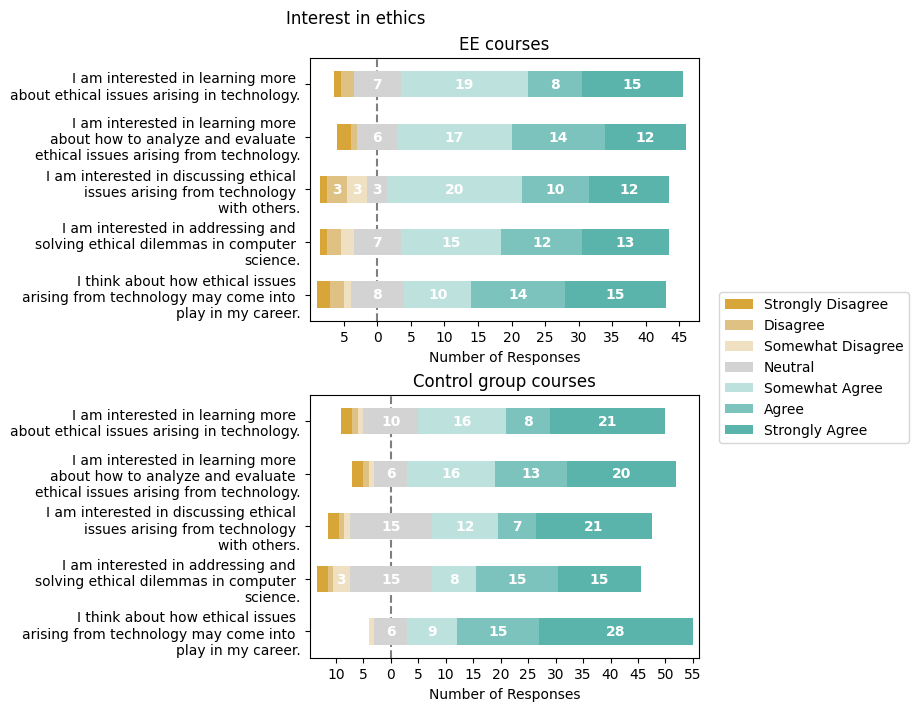

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Interest"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Interest"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Interest in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["I am interested in learning more \nabout ethical issues arising in technology.",
                     "I am interested in learning more \nabout how to analyze and evaluate \nethical issues arising from technology.",
                     "I am interested in discussing ethical \nissues arising from technology \nwith others.",
                     "I am interested in addressing and \nsolving ethical dilemmas in computer \nscience.",
                     "I think about how ethical issues \narising from technology may come into \nplay in my career."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Value
### Value questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


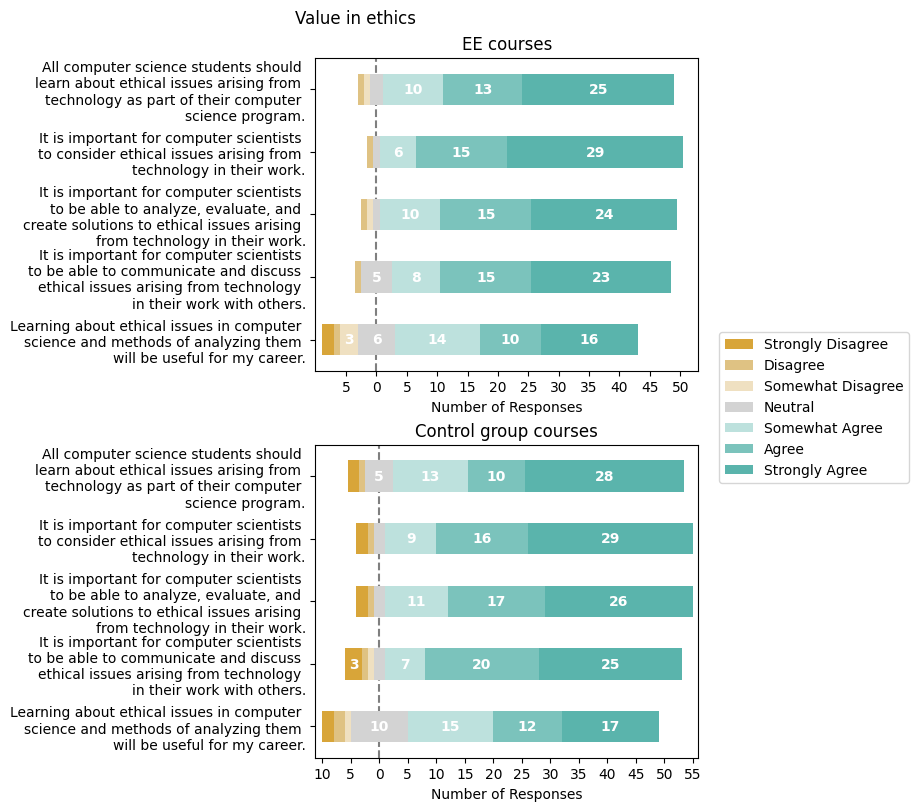

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Value"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Value"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Value in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["All computer science students should \nlearn about ethical issues arising from \ntechnology as part of their computer \nscience program.",
                     "It is important for computer scientists \nto consider ethical issues arising from \ntechnology in their work.",
                     "It is important for computer scientists \nto be able to analyze, evaluate, and \ncreate solutions to ethical issues arising \nfrom technology in their work.",
                     "It is important for computer scientists \nto be able to communicate and discuss \nethical issues arising from technology \nin their work with others.",
                     "Learning about ethical issues in computer \nscience and methods of analyzing them \nwill be useful for my career."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Self-efficacy
### Self-efficacy questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


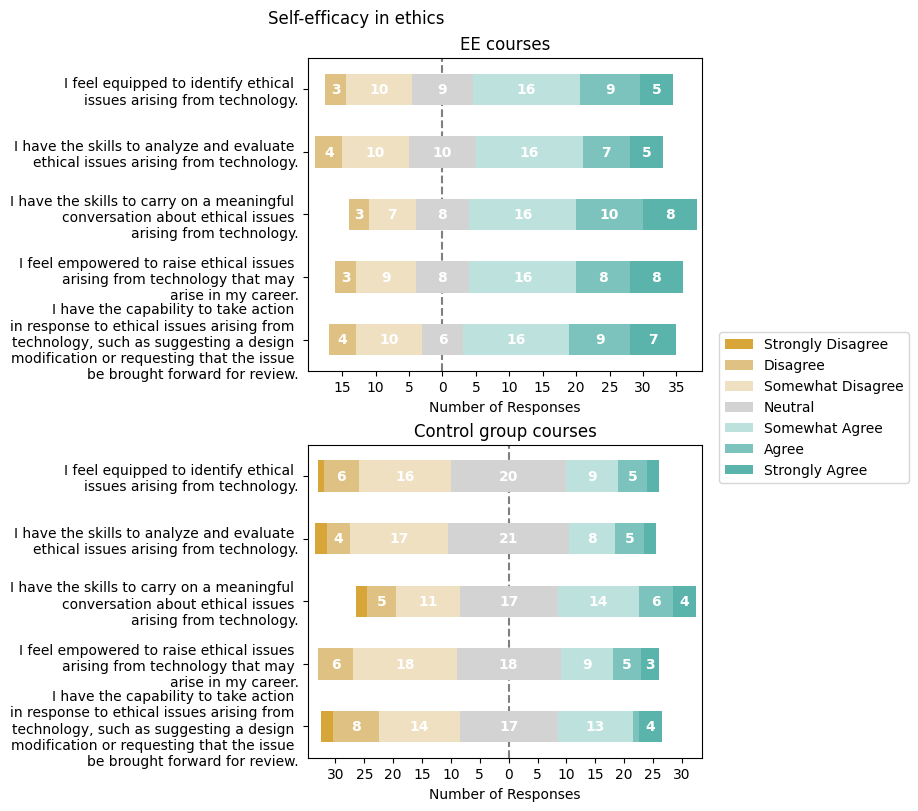

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Self-efficacy"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Self-efficacy"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Self-efficacy in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["I feel equipped to identify ethical \nissues arising from technology.",
                     "I have the skills to analyze and evaluate \nethical issues arising from technology.",
                     "I have the skills to carry on a meaningful \nconversation about ethical issues \narising from technology.",
                     "I feel empowered to raise ethical issues \narising from technology that may \narise in my career.",
                     "I have the capability to take action \nin response to ethical issues arising from \ntechnology, such as suggesting a design \nmodification or requesting that the issue \nbe brought forward for review."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Responsibility
### Responsibility questions EE vs CG

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


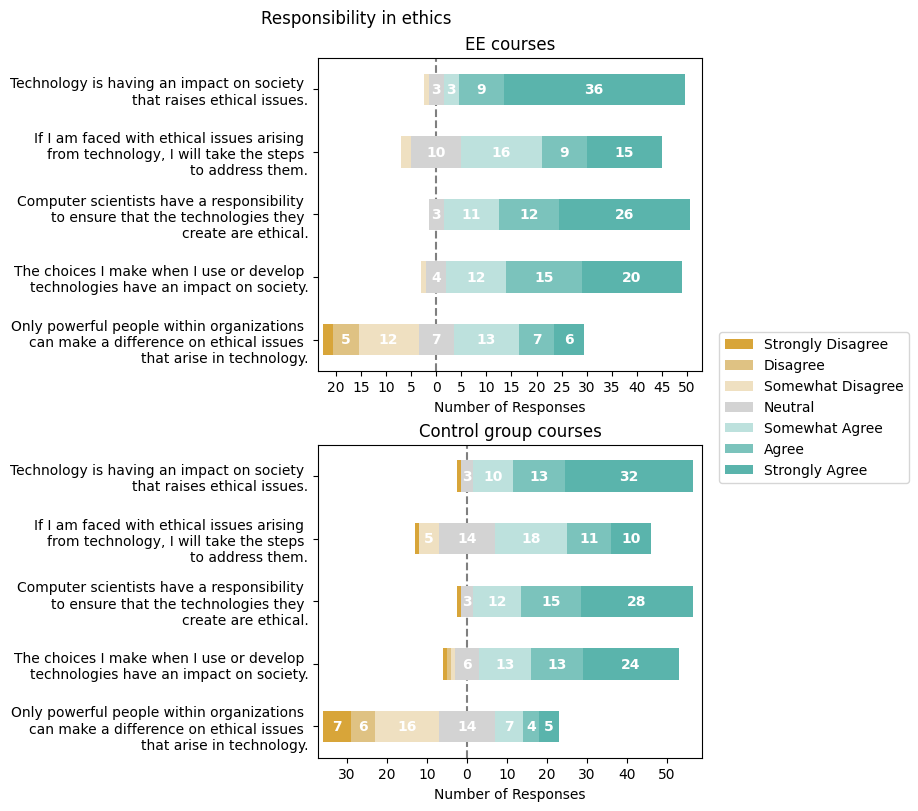

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), constrained_layout=True, sharey=True) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Responsibility"], likert, colors=plot_likert.colors.likert7, bar_labels=True, ax=ax1, legend=False)
plot_likert.plot_likert(cg_data["Responsibility"], likert,colors=plot_likert.colors.likert7, bar_labels=True, ax=ax2, legend=False)

fig.suptitle("Responsibility in ethics")
ax1.set_title("EE courses")
ax2.set_title("Control group courses")

ax1.set_yticklabels(["Technology is having an impact on society \nthat raises ethical issues.",
                     "If I am faced with ethical issues arising \nfrom technology, I will take the steps \nto address them.",
                     "Computer scientists have a responsibility \nto ensure that the technologies they \ncreate are ethical.",
                     "The choices I make when I use or develop \ntechnologies have an impact on society.",
                     "Only powerful people within organizations \ncan make a difference on ethical issues \nthat arise in technology."][::-1])
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.3, 0.6))

## Average per attitude EE vs CG

In [10]:
# interest
interest_avg_ee = ee_data["Interest"].mean().mean()
value_avg_ee = ee_data["Value"].mean().mean()
se_avg_ee = ee_data["Self-efficacy"].mean().mean()
responsibility_avg_ee = ee_data["Responsibility"].mean().mean()
ee_avgs = [interest_avg_ee, value_avg_ee, se_avg_ee, responsibility_avg_ee]

interest_avg_cg = cg_data["Interest"].mean().mean()
value_avg_cg = cg_data["Value"].mean().mean()
se_avg_cg = cg_data["Self-efficacy"].mean().mean()
responsibility_avg_cg = cg_data["Responsibility"].mean().mean()
cg_avgs = [interest_avg_cg, value_avg_cg, se_avg_cg, responsibility_avg_cg]

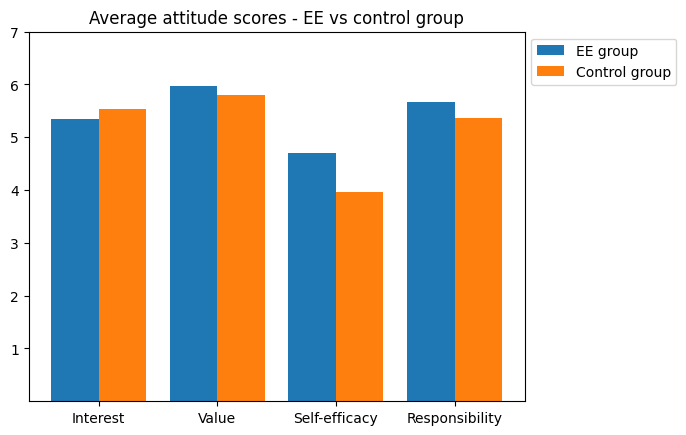

In [11]:
bar_width = 0.4
coords_ee = np.arange(4)
coords_cg = [x + bar_width for x in coords_ee]
questions = ["Interest", "Value", "Self-efficacy", "Responsibility"]
fig = plt.subplots()
plt.bar(coords_ee, ee_avgs, width=bar_width, label="EE group")
plt.bar(coords_cg, cg_avgs, width=bar_width, label="Control group")

plt.yticks(range(1, 8))
plt.xticks(coords_ee + bar_width/2, questions)
plt.title('Average attitude scores - EE vs control group')
plt.legend(loc='upper right', bbox_to_anchor=(1.32, 1))
plt.show()


## Self-assessment

c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\Etomiuk\OneDrive\OneNote\EE_data_analysis\analysis-embedded-ethics\venv\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


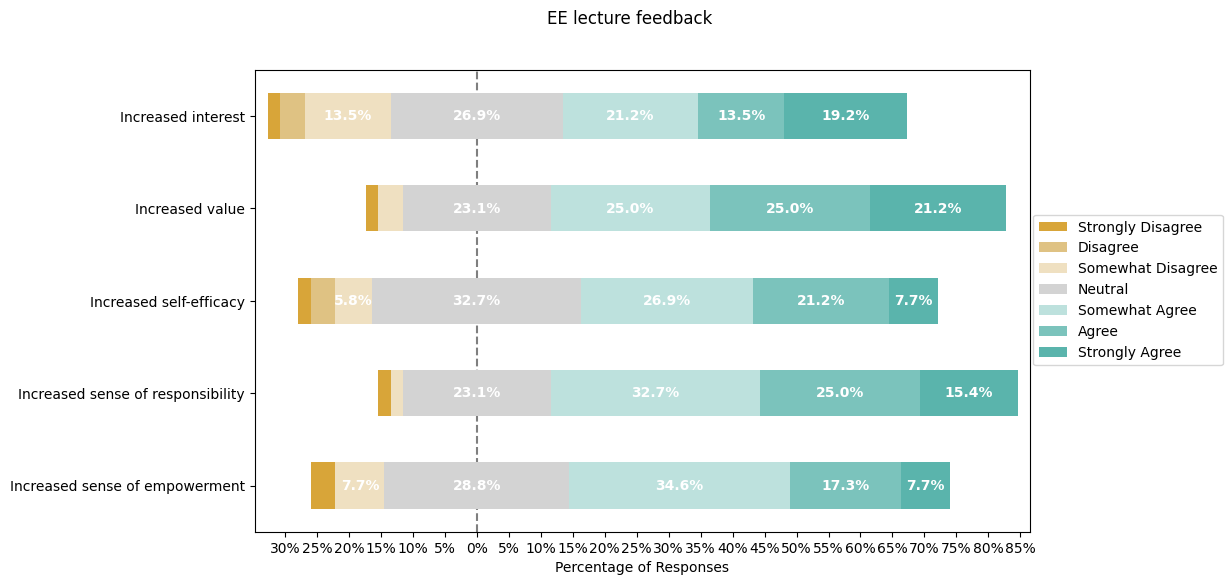

In [18]:
fig, ax = plt.subplots(figsize=(10, 6)) # draw two plots in one row, two columns

plot_likert.plot_likert(ee_data["Self-assessment"], likert, colors=plot_likert.colors.likert7, plot_percentage=True, bar_labels=True, legend=False, ax=ax)

fig.suptitle("EE lecture feedback")
'''
ax.set_yticklabels(["The Embedded Ethics lecture \nincreased my interest in \nlearning about ethics in \ncomputer science.",
                     "After the Embedded Ethics \nlecture, I believe more \nstrongly that all computer \nscientists should be aware \nof and able to analyze ethical \nissues arising from technology.",
                     "The Embedded Ethics lecture \nincreased my confidence \nin my ethical reasoning \nskils in computer science.",
                     "After the Embedded Ethics \nlecture, I believe more \nstrongly that computer scientists \nhave a shared responsibility \nto address ethical issues \narising from technology.",
                     "After the Embedded Ethics \nlecture, I feel more empowered \nto take steps to address \nissues arising from technology."][::-1])
'''
ax.set_yticklabels(["Increased interest",
                    "Increased value",
                    "Increased self-efficacy",
                    "Increased sense of responsibility",
                    "Increased sense of empowerment"][::-1])
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, likert_values, bbox_to_anchor=(1.1, 0.65))